## **<h3 align="center"> Deep Learning - Project </h3>**
# **<h3 align="center"> Phylum Chordata - Xana/Sven</h3>**
**Group 4 members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Steven Carlson - 20240554@novaims.unl.pt - 20240554<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub - 20240505@novaims.unl.pt - 20240505<br>
Zofia Wojcik  - 20240654@novaims.unl.pt - 20240654<br>

# Table of Contents
* [1. Introduction](#intro)
* [2. Setup](#setup)
* [3. Data Loading](#dataloading)
* [4. Image Preprocessing](#imagepreprocessing)
* [5. Neural Networks Models](#nnmodels)



# 1. Introduction <a class="anchor" id="intro"></a>

In this third notebook, we will preprocess images from the **Chordata** phylum and develop a deep learning model to accurately classify them at the family level.

# 2. Setup <a class="anchor" id="setup"></a>
In this section, we will import the necessary libraries that will be used throughout the notebook. These libraries will help with data handling and image processing.

In [11]:
# Standard libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import random


# Libraries for image processing
from glob import glob
from PIL import Image

# 3. Data Loading <a class="anchor" id="dataloading"></a>

Let's open the train and test for Chordata Phylum.

In [12]:
# Load the DataFrame from the CSV file
chordata_train = pd.read_csv("train_test_splits/Chordata_train.csv")
chordata_train.head(3)

eol_content_id  eol_page_id   kingdom    phylum        family  \
0        14186361     46559486  animalia  chordata  trionychidae   
1        29468590      4453294  animalia  chordata       cebidae   
2        22248395     45512569  animalia  chordata  ramphastidae   

                                           file_path  
0  chordata_trionychidae/14186361_46559486_eol-fu...  
1  chordata_cebidae/29468590_4453294_eol-full-siz...  
2  chordata_ramphastidae/22248395_45512569_eol-fu...

In [13]:
# Load the DataFrame from the CSV file
chordata_test = pd.read_csv("train_test_splits/Chordata_test.csv")
chordata_test.head(3)

eol_content_id  eol_page_id   kingdom    phylum          family  \
0        30109933     45518587  animalia  chordata    pardalotidae   
1         8828493       328029  animalia  chordata      mustelidae   
2        24592455     46559814  animalia  chordata  carcharhinidae   

                                           file_path  
0  chordata_pardalotidae/30109933_45518587_eol-fu...  
1  chordata_mustelidae/8828493_328029_eol-full-si...  
2  chordata_carcharhinidae/24592455_46559814_eol-...

In [14]:
chordata_train['family'].value_counts()

family
dactyloidae        240
cercopithecidae    239
plethodontidae     216
salamandridae      216
carcharhinidae     213
                  ... 
mesitornithidae     23
pardalotidae        23
percidae            23
pristidae           23
salmonidae          23
Name: count, Length: 166, dtype: int64

In [15]:
chordata_train.shape, chordata_test.shape

((7868, 6), (1968, 6))

# 4. Image Preprocessing <a class="anchor" id="imagepreprocessing"></a>

We’ll resize all images to a common shape to create a baseline dataset. In the process, we’ll store the original image (as a NumPy array) in a column called "original_image" and the resized version in a column called "baseline_image". This way, we keep everything in one place, and the original version can still be used for submission.

Since working with full-size images takes up a lot of memory, especially when training deep learning models, we’ll reduce the image size to 50% of the original. This helps us work faster and avoid memory issues during development.

We'll store the resized images in a new column called "resized_image_50" in the train, validation, and test datasets. These smaller versions are normalized (values between 0 and 1) and will be used for our baseline model.

In [16]:
def add_images_with_baseline(df, image_folder="rare_species", baseline_size=224, scale=0.5):
    df = df.copy()
    
    # Use an f-string to name the column dynamically
    column_name = f"baseline_image_{int(scale * 100)}"
    df[column_name] = None

    target_size = int(baseline_size * scale)

    for idx, row in df.iterrows():
        file_path = os.path.join(image_folder, row["file_path"])
        try:
            img = Image.open(file_path).convert("RGB")
            img_resized = img.resize((baseline_size, baseline_size))
            img_downscaled = img_resized.resize((target_size, target_size))
            df.at[idx, column_name] = np.array(img_downscaled)
        except Exception as e:
            print(f"Couldn't process image at {file_path}: {e}")
    
    return df

chordata_train = add_images_with_baseline(chordata_train)


In [17]:
chordata_test = add_images_with_baseline(chordata_test)

In [18]:
chordata_train

eol_content_id  eol_page_id   kingdom    phylum        family  \
0           14186361     46559486  animalia  chordata  trionychidae   
1           29468590      4453294  animalia  chordata       cebidae   
2           22248395     45512569  animalia  chordata  ramphastidae   
3           29716270     51263523  animalia  chordata    dasyatidae   
4           12281911     46559476  animalia  chordata   cheloniidae   
...              ...          ...       ...       ...           ...   
7863        28905603       212582  animalia  chordata    dasyatidae   
7864           11819      1052882  animalia  chordata    thraupidae   
7865        29364686     46559421  animalia  chordata    balaenidae   
7866        22323730     46564942  animalia  chordata  merlucciidae   
7867        20599594     45513966  animalia  chordata   glareolidae   

                                              file_path  \
0     chordata_trionychidae/14186361_46559486_eol-fu...   
1     chordata_cebidae/29468590_4453294_eol-full-siz...   
2     chordata_ramphastidae/22248395_45512569_eol-fu...   
3     chordata_dasyatidae/29716270_51263523_eol-full...   
4     chordata_cheloniidae/12281911_46559476_eol-ful...   
...                                                 ...   
7863  chordata_dasyatidae/28905603_212582_eol-full-s...   
7864  chordata_thraupidae/11819_1052882_eol-full-siz...   
7865  chordata_balaenidae/29364686_46559421_eol-full...   
7866  chordata_merlucciidae/22323730_46564942_eol-fu...   
7867  chordata_glareolidae/20599594_45513966_eol-ful...   

                                      baseline_image_50  
0     [[[208, 179, 119], [211, 182, 123], [213, 184,...  
1     [[[95, 113, 89], [80, 104, 67], [81, 100, 67],...  
2     [[[32, 37, 31], [32, 35, 32], [31, 36, 30], [3...  
3     [[[3, 158, 205], [3, 143, 182], [3, 128, 175],...  
4     [[[191, 188, 183], [194, 191, 186], [204, 202,...  
...                                                 ...  
7863  [[[3, 88, 133], [3, 133, 142], [4, 131, 132], ...  
7864  [[[160, 154, 118], [167, 158, 124], [184, 176,...  
7865  [[[48, 153, 241], [55, 151, 242], [54, 148, 24...  
7866  [[[192, 198, 195], [186, 190, 188], [189, 193,...  
7867  [[[157, 168, 188], [158, 169, 189], [160, 170,...  

[7868 rows x 7 columns]

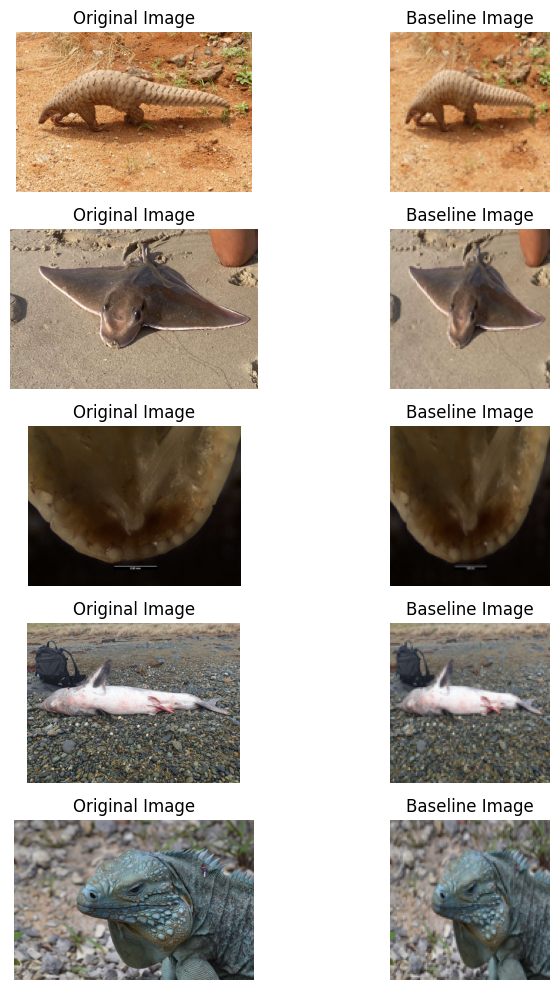

In [21]:
def show_random_image_pairs(df, image_folder="rare_species", image_column="baseline_image_50", num_samples=5):
    sample_df = df.sample(num_samples, random_state=42).reset_index(drop=True)

    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))
    for i in range(num_samples):
        row = sample_df.loc[i]
        file_path = os.path.join(image_folder, row["file_path"])

        try:
            # Load original image from file
            original_img = Image.open(file_path).convert("RGB")

            # Get the baseline image from the DataFrame
            baseline_img = row[image_column]

            # Plot original image
            axes[i, 0].imshow(original_img)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")

            # Plot resized image
            axes[i, 1].imshow(baseline_img)
            axes[i, 1].set_title("Baseline Image")
            axes[i, 1].axis("off")
        except Exception as e:
            print(f"Error showing image {file_path}: {e}")

    plt.tight_layout()
    plt.show()

# Example call
show_random_image_pairs(chordata_train)

# 5. Prepare the Data for the Model <a class="anchor" id="prepare_data"></a>

In this section, we load the preprocessed image data and corresponding labels required for modeling our Convolutional Neural Network.

In [25]:
print(chordata_train["baseline_image_50"].shape)
print(chordata_train["baseline_image_50"][1].shape , "\n")

(7868,)
(112, 112, 3) 



In [26]:
chordata_train['family'].shape

(7868,)

# 6. Neural Network Models <a class="anchor" id="nnmodels"></a>

## 6.1. Baseline Model <a class="anchor" id="baseline_model"></a>

Now that we’ve defined our baseline CNN model for the Chordata phylum, we’ll: <br>
- Train it on the resized images stored in the baseline_image_50 column. <br>
- Use a validation set to monitor performance across epochs. <br>
- Save the model inside a dedicated folder: models/chordata_models. <br>
- This will help us keep our models organized as we build one per phylum.



In [29]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("models", exist_ok=True)
os.makedirs("models/chordata_models", exist_ok=True)

In [37]:
# Prepare input shape and data
input_shape_50 = chordata_train['baseline_image_50'].iloc[0].shape

X_train = np.stack(chordata_train['baseline_image_50'].values)
X_test = np.stack(chordata_test['baseline_image_50'].values)

le = LabelEncoder()
y_train_encoded = le.fit_transform(chordata_train['family'])
y_test_encoded = le.transform(chordata_test['family'])

y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

num_classes = y_train_cat.shape[1]

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(0.4989220038046924), 1: np.float64(0.6675716952316307), 2: np.float64(0.9874497991967871), 3: np.float64(1.9748995983935742), 4: np.float64(1.9748995983935742), 5: np.float64(2.0607647983237296), 6: np.float64(1.0084593693924635), 7: np.float64(0.9874497991967871), 8: np.float64(0.3434607997206216), 9: np.float64(0.9874497991967871), 10: np.float64(0.9874497991967871), 11: np.float64(0.9874497991967871), 12: np.float64(1.9748995983935742), 13: np.float64(0.4016744945885236), 14: np.float64(1.9748995983935742), 15: np.float64(1.9748995983935742), 16: np.float64(1.9748995983935742), 17: np.float64(1.0084593693924635), 18: np.float64(1.9748995983935742), 19: np.float64(0.24686244979919678), 20: np.float64(1.9748995983935742), 21: np.float64(0.28381790635596277), 22: np.float64(0.3982990786676116), 23: np.float64(0.9874497991967871), 24: np.float64(2.0607647983237296), 25: np.float64(0.49372489959839355), 26: np.float64(1.9748995983935742), 27: np.float64(1.97

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Build the model
input_layer = Input(shape=input_shape_50)

conv1 = Conv2D(20, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)

conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)

conv3 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.001))(pool2)

flatten = Flatten()(conv3)

dense1 = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(flatten)
drop1 = Dropout(0.5)(dense1)

dense2 = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(drop1)
drop2 = Dropout(0.5)(dense2)

output_layer = Dense(num_classes, activation="softmax")(drop2)

baseline_model = Model(inputs=input_layer, outputs=output_layer)
baseline_model.summary()

# Compile
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
os.makedirs("models/chordata_models", exist_ok=True)

checkpoint = ModelCheckpoint(
    "models/chordata_models/baseline_best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 112, 112, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 37, 37, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 60)     │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8640)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     4,424,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 166)            │        42,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,627,642 (17.65 MB)

 Trainable params: 4,627,642 (17.65 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train
history = baseline_model.fit(
    X_train, y_train_cat,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test_cat),
    class_weight=class_weights_dict,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.0077 - loss: 17.7669
Epoch 1: val_loss improved from inf to 6.03043, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.0077 - loss: 17.7293 - val_accuracy: 0.0224 - val_loss: 6.0304
Epoch 2/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0160 - loss: 6.0540
Epoch 2: val_loss improved from 6.03043 to 5.95339, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.0160 - loss: 6.0538 - val_accuracy: 0.0224 - val_loss: 5.9534
Epoch 3/40
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0165 - loss: 5.9072
Epoch 3: val_loss improved from 5.95339 to 5.83866, saving model to models/chordata_models/baseline_best_model.keras
246/246 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.0165 - loss: 5.9071 - val_accuracy: 0.0152 - val_loss: 5.8387
Epoch 4/40
246/246 ━━━━━━━━

In [42]:
#This function is used in notebook 2, notebook 3 and notebook 4
import matplotlib.pyplot as plt

def plot_loss(history):
    """
    Plot the training and validation loss over epochs.

    Parameters:
    - history: History object returned by model.fit() containing training/validation loss values.

    Returns:
    - None (displays a plot of training and validation loss)
    """
    plt.figure(figsize=(7, 2))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

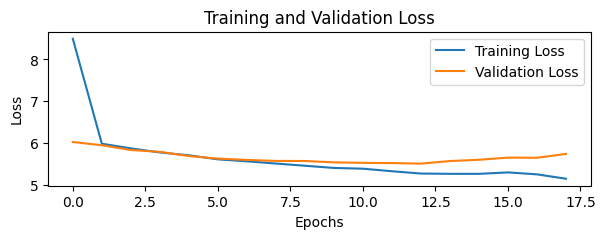

In [43]:
plot_loss(history)